In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, NMF
from sklearn.datasets import fetch_openml, fetch_lfw_people
from sklearn.preprocessing import StandardScaler

In [32]:
# Téléchargement des données MNIST
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

In [33]:
N, d = X.shape  
print(f"Nombre d'images: {N}, Nombre de pixels par image: {d}")

Nombre d'images: 70000, Nombre de pixels par image: 784


In [34]:
# Sélection aléatoire de 200 images
np.random.seed(42)
indices = np.random.choice(N, 200, replace=False)
Z = X[indices, :]

In [35]:
# Calcul des matrices centrées et réduites
Zm = Z.mean(axis=0)
Zr = Z / Z.std()
Zcr = (Z - Zm) / Z.std()

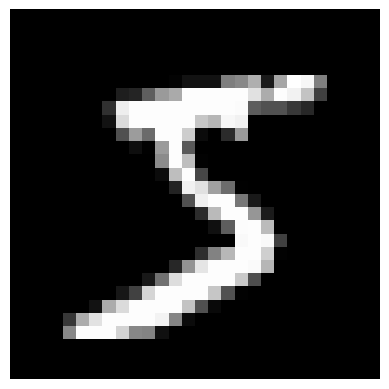

In [36]:
# Fonction d'affichage d'une image
def affiche(u):
    plt.imshow(u.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()
    
# Test avec une image aléatoire
affiche(X[0])

In [37]:
# Implémentation de PCA et NMF
def decomposition(Z, K, maxiter=1000, nmf=True):
    if nmf:
        model = NMF(n_components=K, max_iter=maxiter, init='random', random_state=42)
    else:
        model = PCA(n_components=K)

    W = model.fit_transform(Z)
    H = model.components_
    return W, H

In [38]:
# Exécution pour différentes valeurs de K
K_values = [5, 20, 50, 100]
results = {}

for K in K_values:
    if K == 5 : 
        W_pca, H_pca = decomposition(Zcr, K, maxiter=1500, nmf=False)
        W_nmf, H_nmf = decomposition(Zr, K, maxiter=1500, nmf=True)
    else : 
        W_pca, H_pca = decomposition(Zcr, K, maxiter=5000, nmf=False)
        W_nmf, H_nmf = decomposition(Zr, K, maxiter=5000, nmf=True)
    results[K] = {"PCA": (W_pca, H_pca), "NMF": (W_nmf, H_nmf)}

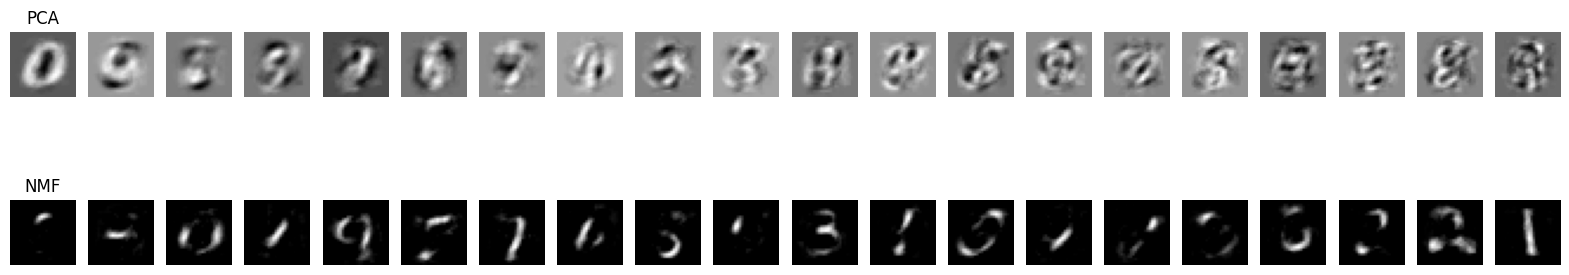

In [39]:
# Afficher les images pour l'ACP et la NMF pour un K fixé
K_chosen = 20
W_pca, H_pca = results[K_chosen]["PCA"]
W_nmf, H_nmf = results[K_chosen]["NMF"]

fig, axes = plt.subplots(2, K_chosen, figsize=(20, 4))

for i in range(K_chosen):
    axes[0, i].imshow(H_pca[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(H_nmf[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("PCA")
axes[1, 0].set_title("NMF")

plt.show()

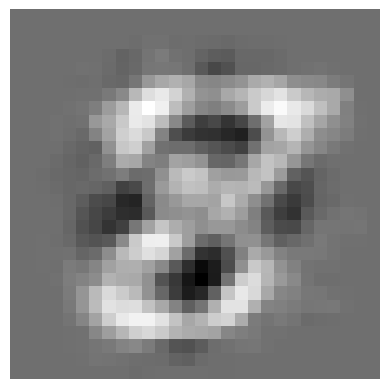

In [40]:
def reconstruit(W, H, i):
    return np.dot(W[i, :], H)

# Test sur une image
image_reconstruite = reconstruit(W_pca, H_pca, 0)
affiche(image_reconstruite)

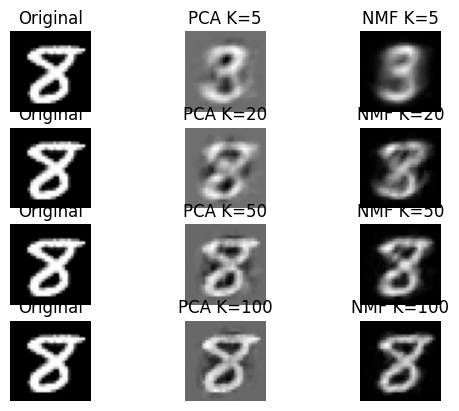

In [41]:
#Visualisation de la qualité des images selon K
fig, axes = plt.subplots(len(K_values), 3)

for i, K in enumerate(K_values):
    W_pca, H_pca = results[K]["PCA"]
    W_nmf, H_nmf = results[K]["NMF"]

    original = Z[0]
    pca_recon = reconstruit(W_pca, H_pca, 0) + Zm[0]
    nmf_recon = reconstruit(W_nmf, H_nmf, 0)

    axes[i, 0].imshow(original.reshape(28, 28), cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Original")

    axes[i, 1].imshow(pca_recon.reshape(28, 28), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"PCA K={K}")

    axes[i, 2].imshow(nmf_recon.reshape(28, 28), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f"NMF K={K}")

plt.show()

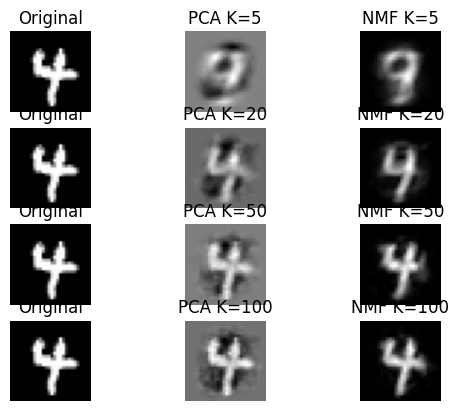

In [42]:
#Autre exemple
fig, axes = plt.subplots(len(K_values), 3)

for i, K in enumerate(K_values):
    W_pca, H_pca = results[K]["PCA"]
    W_nmf, H_nmf = results[K]["NMF"]

    original = Z[1]
    pca_recon = reconstruit(W_pca, H_pca, 1) + Zm[1]
    nmf_recon = reconstruit(W_nmf, H_nmf, 1)

    axes[i, 0].imshow(original.reshape(28, 28), cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Original")

    axes[i, 1].imshow(pca_recon.reshape(28, 28), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"PCA K={K}")

    axes[i, 2].imshow(nmf_recon.reshape(28, 28), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f"NMF K={K}")

plt.show()

**Etape 11 (Bonus) Réappliquez votre algorithme à un dataset contenant des visages.**

C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\decomposition\_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


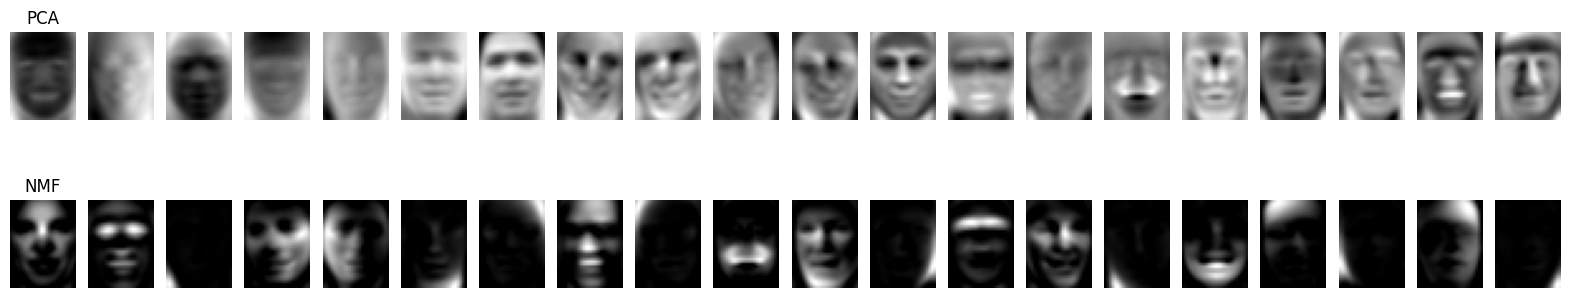

In [43]:
#Application de l'algorithme à un dataset contenant des visages

# Charger le dataset LFW 
lfw_dataset = fetch_lfw_people(resize=0.28)
X_faces = lfw_dataset.data
n_samples, h, w = lfw_dataset.images.shape  

# Définir le nombre de composantes
K_faces = 20

# Appliquer PCA et NMF
W_faces_pca, H_faces_pca = decomposition(X_faces, K_faces, nmf=False)
W_faces_nmf, H_faces_nmf = decomposition(X_faces, K_faces, nmf=True)

# Affichage des composantes principales
fig, axes = plt.subplots(2, K_faces, figsize=(20, 4))

for i in range(K_faces):
    axes[0, i].imshow(H_faces_pca[i].reshape(h, w), cmap='gray')  
    axes[0, i].axis('off')
    axes[1, i].imshow(H_faces_nmf[i].reshape(h, w), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("PCA")
axes[1, 0].set_title("NMF")

plt.show()